In [2]:
from dglchem.utils import featurizer as fe
from dglchem.utils import featurizer_old as fo
from rdkit import Chem

mol = Chem.MolFromSmiles('COO')
feat = fe.AtomFeaturizer()
feat_old = fo.AtomFeaturizerOld()

bond = fe.BondFeaturizer()
bond_old = fo.BondFeaturizer()

assert feat(mol) is not None 
assert bond(mol) is not None
assert (feat(mol)[0] == feat_old(mol)['h'][0]).all()
assert (bond(mol)[0] == bond_old(mol)['e'][0]).all()
print('Featurizers are fine!')

#%timeit feat(mol)
#%timeit feat_old(mol)
#%timeit bond(mol)
#%timeit bond_old(mol)

Featurizers are fine!


In [1]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()

assert data.get_splits('consecutive') is not None
print('consecutive is a success')
assert data.get_splits('random') is not None
print('random is a success')
assert data.get_splits('molecular_weight') is not None
print('molecular_weight is a success')
#assert data.get_splits('stratified') is not None
#print('stratified is a success')

[<dgl.data.utils.Subset object at 0x177709f50>, <dgl.data.utils.Subset object at 0x29d014f50>, <dgl.data.utils.Subset object at 0x29d046890>]
consecutive is a success
random is a success
Start initializing RDKit molecule instances...
Creating RDKit molecule instance 1000/2999
Creating RDKit molecule instance 2000/2999
Start computing molecular weights.
Computing molecular weight for compound 1000/2999
Computing molecular weight for compound 2000/2999
molecular_weight is a success


In [1]:
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils.data_splitting import taylor_butina_clustering
data = BradleyDoublePlus()

clusters = taylor_butina_clustering(data)

[0 0 0 ... 0 0 0]
1813
57
59
60
63
73
82
109
115
116
117
121
124
129
130
135
144
145
179
201
202
203
228
234
248
262
276
278
288
318
322
326
329
335
336
387
391
401
402
411
417
419
429
431
433
435
437
440
452
456
472
474
478
481
487
503
507
508
509
516
521
523
526
527
531
534
538
544
562
572
587
588
598
600
601
602
604
610
617
623
625
630
631
633
639
646
657
661
675
679
681
688
695
702
707
710
712
713
715
722
729
744
745
762
772
777
779
790
794
800
814
821
822
837
839
846
852
862
868
869
870
894
913
914
918
923
926
935
946
958
959
960
970
972
982
988
992
993
994
995
996
997
1001
1002
1017
1025
1031
1033
1034
1036
1040
1044
1047
1048
1056
1059
1062
1066
1080
1083
1084
1085
1088
1094
1098
1100
1115
1116
1117
1119
1121
1122
1124
1125
1126
1128
1130
1132
1137
1140
1141
1144
1145
1146
1147
1155
1156
1159
1160
1163
1165
1172
1174
1177
1183
1194
1196
1199
1204
1210
1216
1222
1226
1227
1228
1239
1240
1243
1245
1251
1264
1272
1278
1279
1281
1282
1283
1285
1291
1300
1301
1311
1312
1317
1327
1332

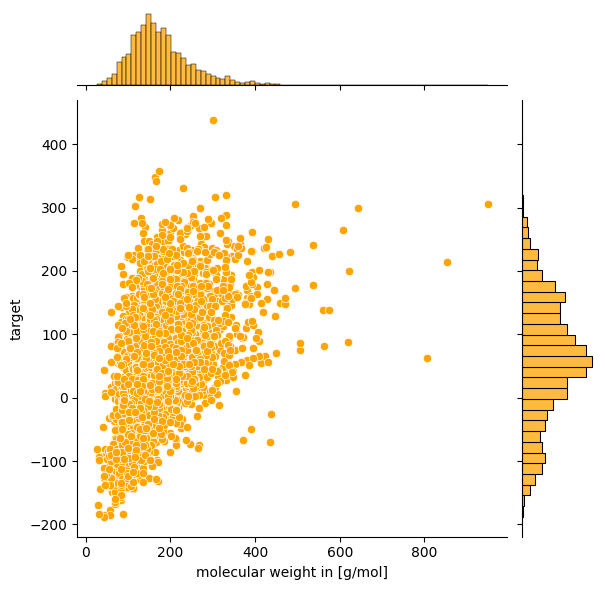

In [1]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()

data.weight_vs_target_plot()

In [1]:
import torch
import torch.nn.functional as F
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils import DataSet
from dglchem.models import MGConv
from torch_geometric.loader import DataLoader

dataset = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
#dataset.draw_smile(0).show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data = dataset[0].to(device)

model = MGConv(num_layers=2, node_dim=data.num_node_features, edge_dim=data.num_edge_features).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.mse_loss(out, data.y)
    print(loss.detach().numpy())
    loss.backward()
    optimizer.step()

Loaded dataset.


NameError: name 'data' is not defined

In [ ]:
from dglchem.utils import DataSet

In [6]:
from torch import Tensor, cat
y = Tensor([1,0,1,1])
x = Tensor([0,1,2,3])

print(cat((x,y)))

tensor([0., 1., 2., 3., 1., 0., 1., 1.])


Dataset length: 2999
Dictionary length: 2999


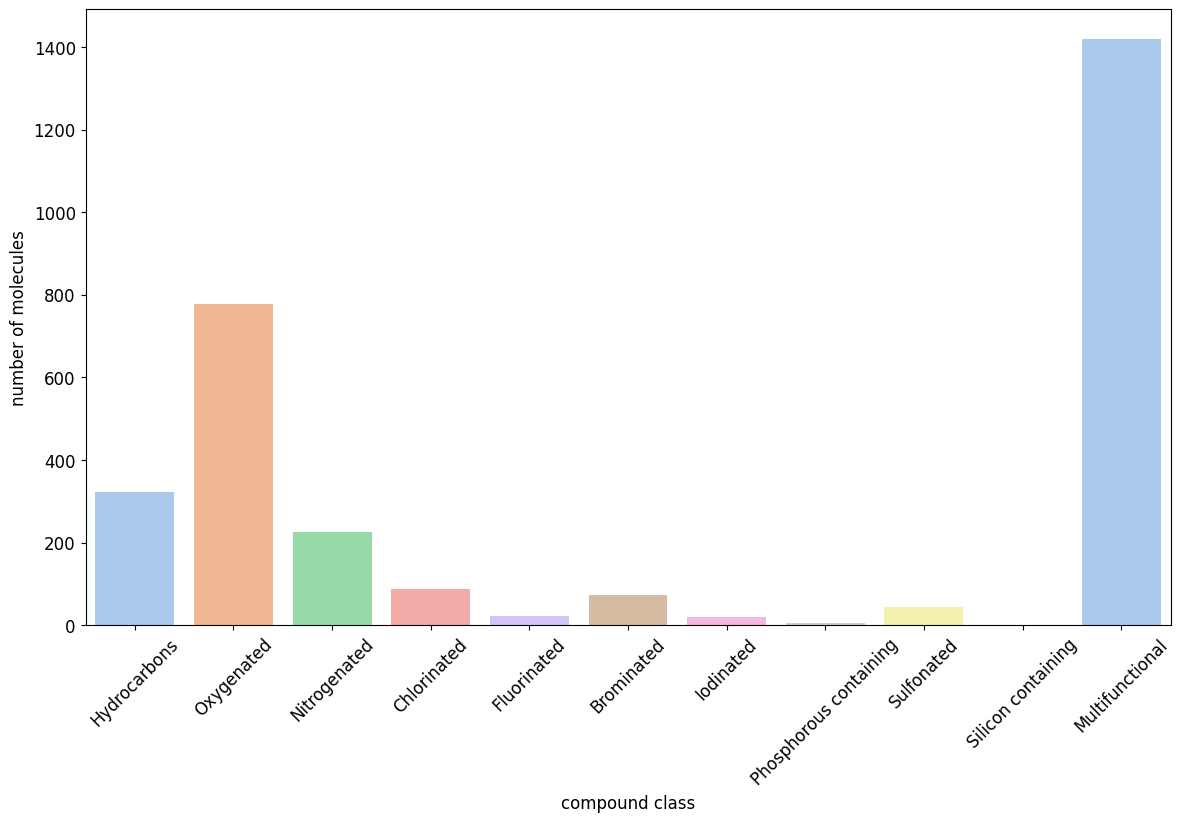

In [1]:
%matplotlib inline
from dglchem.datasets import BradleyDoublePlus
dataset = BradleyDoublePlus()

from dglchem.utils import classify_compounds
_, num_dict = classify_compounds(dataset.smiles)
l = 0
for key in num_dict.keys():
    l+=num_dict[key]
print(f'Dataset length: {len(dataset.smiles)}', f'Dictionary length: {l}', sep='\n')
    

from dglchem.utils import compound_nums_chart
compound_nums_chart(dataset.smiles, save_fig=True)


In [1]:
from rdkit.Chem import MolFromSmiles

def add_atom_mass_above_30(atom):
            if atom.GetMass() > 15:
                return [True]
            else:
                return [False]


from dglchem.utils import AtomFeaturizer
featurizer = AtomFeaturizer(atom_feature_list = ['atom_type_one_hot'])
featurizer_raw = AtomFeaturizer(atom_feature_list = ['atom_type_one_hot'])
featurizer.extend_features(['garbo'],[add_atom_mass_above_30])

print(featurizer(MolFromSmiles('COO')))
print(featurizer_raw(MolFromSmiles('COO')))
print(featurizer.atom_feature_list)

Testing the function with C atom. The output is: [False]
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]])
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.]])
['atom_type_one_hot', 'garbo']


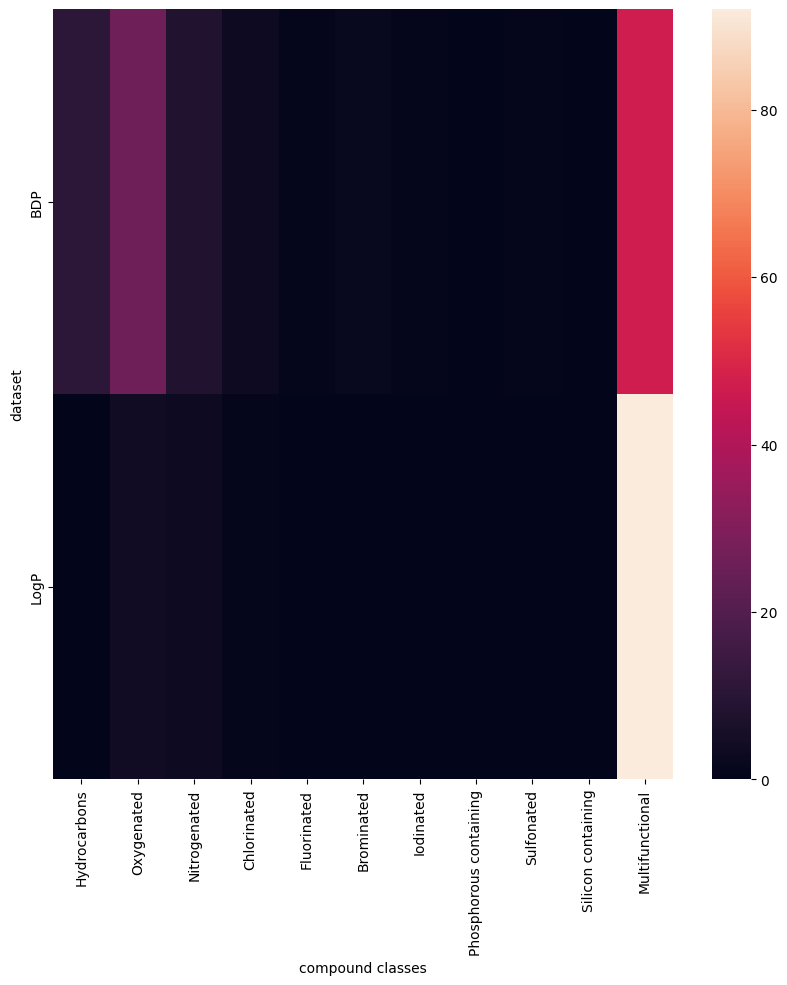

In [1]:
from dglchem.datasets import BradleyDoublePlus, LogP
from dglchem.utils import compounds_dataset_heatmap

smiles1 = BradleyDoublePlus().smiles
smiles2 = LogP().smiles
compounds_dataset_heatmap([smiles1,smiles2],['BDP','LogP'],save_fig=True)

Loaded dataset.


epoch=45, training loss= 0.279, validation loss= 0.263: 100%|██████████| 50/50 [00:12<00:00,  3.92it/s]


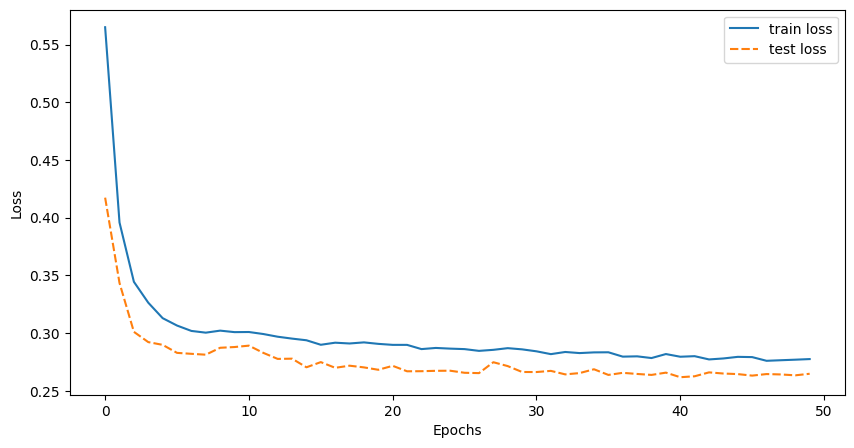

In [1]:
import numpy as np
from dglchem.utils import loss_plot
from dglchem.utils import GraphDataSet
from dglchem.utils import train_model
from dglchem.models import MGConv
import torch.nn.functional as F
import torch

device = torch.device('cpu')
graph_data = GraphDataSet(file_path='./data/processed/BradleyDoublePlus.pickle',split=True)
model = MGConv(num_layers=2, node_dim=graph_data.num_node_features, edge_dim=graph_data.num_edge_features).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss = F.mse_loss

trl, tl = train_model(model, loss_func=loss, optimizer=optimizer, train_data_loader=graph_data.train,
                      test_data_loader=graph_data.test, early_stopping=False)



loss_plot([trl,tl],['train loss','test loss'])

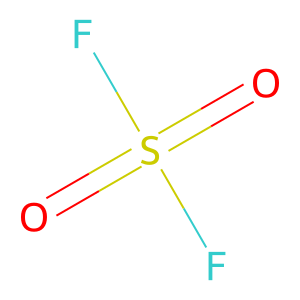

In [3]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()
data.draw_smile(2)

In [1]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()
data.save_dataset()

File saved at: ./data/processed/BradleyDoublePlus.pickle/BradleyDoublePlus.pickle


In [1]:
from dglchem.datasets import LogP
data = LogP()
data.save_dataset()

File saved at: ./data/processed/LogP.pickle


In [1]:
from dglchem.utils import DataSet
from dglchem.datasets import BradleyDoublePlus
#data = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
%timeit data = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
%timeit data = BradleyDoublePlus()

Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
243 ms ± 2.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.01 s ± 9.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
from dglchem.datasets import LogP
from dglchem.utils import DataSet
%timeit data = DataSet(file_path='./data/processed/LogP.pickle')
%timeit data = LogP()

Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
Loaded dataset.
1.06 s ± 5.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.1 s ± 421 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
